## Pattern Mining

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Untitled folder/cleaned_wildfire_dataset.csv')

<ipython-input-2-bb9101678057>:1: DtypeWarning: Columns (7,9,10,11,12,13,14,22,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Untitled folder/cleaned_wildfire_dataset.csv')


In [ ]:
import pandas as pd
data = pd.read_csv('cleaned_wildfire_dataset.csv')

/var/folders/t8/5qy83krd04n96dc5kqzjmrch0000gn/T/ipykernel_4272/1920909683.py:2: DtypeWarning: Columns (7,9,10,11,12,13,14,22,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('cleaned_wildfire_dataset.csv')


In [3]:
data['DISCOVERY_SEASON'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [4]:
data['FIRE_SIZE_CLASS'].unique()

array(['A', 'B', 'G', 'C', 'D', 'F', 'E'], dtype=object)

In [5]:
from itertools import chain
from mlxtend.frequent_patterns import apriori, association_rules

size_class_labels = {
    'A': '0 - 0.25 acres',
    'B': '0.26 - 9.9 acres',
    'C': '10 - 99.9 acres',
    'D': '100 - 299 acres',
    'E': '300 - 999 acres',
    'F': '1000 - 4999 acres',
    'G': '5000+ acres'
}

# Replace FIRE_SIZE_CLASS codes with human-readable descriptions
data['FIRE_SIZE_CLASS'] = data['FIRE_SIZE_CLASS'].map(size_class_labels)

# Create transactional data (include FIRE_SIZE_CLASS instead of the binned size)
data['DISCOVERY_SEASON'] = data['DISCOVERY_SEASON'].astype(str)
data['FIRE_SIZE_CLASS'] = data['FIRE_SIZE_CLASS'].astype(str)

# Select relevant columns and create dummy variables
transactions = data[['FIRE_SIZE_CLASS', 'NWCG_CAUSE_CLASSIFICATION', 'DISCOVERY_SEASON']].astype(str)
transactions = pd.get_dummies(transactions)

# Apply Apriori Algorithm
frequent_itemsets = apriori(transactions, min_support=0.01, use_colnames=True)

print(frequent_itemsets)

     support                                           itemsets
0   0.380458                   (FIRE_SIZE_CLASS_0 - 0.25 acres)
1   0.479425                 (FIRE_SIZE_CLASS_0.26 - 9.9 acres)
2   0.111608                  (FIRE_SIZE_CLASS_10 - 99.9 acres)
3   0.014763                  (FIRE_SIZE_CLASS_100 - 299 acres)
4   0.773977                  (NWCG_CAUSE_CLASSIFICATION_Human)
5   0.083931  (NWCG_CAUSE_CLASSIFICATION_Missing data/not sp...
6   0.142092                (NWCG_CAUSE_CLASSIFICATION_Natural)
7   0.179156                            (DISCOVERY_SEASON_Fall)
8   0.335654                          (DISCOVERY_SEASON_Spring)
9   0.328084                          (DISCOVERY_SEASON_Summer)
10  0.157106                          (DISCOVERY_SEASON_Winter)
11  0.270446  (FIRE_SIZE_CLASS_0 - 0.25 acres, NWCG_CAUSE_CL...
12  0.032853  (FIRE_SIZE_CLASS_0 - 0.25 acres, NWCG_CAUSE_CL...
13  0.077159  (NWCG_CAUSE_CLASSIFICATION_Natural, FIRE_SIZE_...
14  0.072362  (FIRE_SIZE_CLASS_0 - 0.25 

In [6]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=3)

rules_sorted = rules.sort_values(by='lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
rules_sorted.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
51,(NWCG_CAUSE_CLASSIFICATION_Natural),"(DISCOVERY_SEASON_Summer, FIRE_SIZE_CLASS_0 - 0.25 acres)",0.142092,0.164437,0.06150,0.432816,2.632114,1.0,0.038135,1.473179,0.722778,0.250990,0.321196,0.403410
50,"(DISCOVERY_SEASON_Summer, FIRE_SIZE_CLASS_0 - 0.25 acres)",(NWCG_CAUSE_CLASSIFICATION_Natural),0.164437,0.142092,0.06150,0.374003,2.632114,1.0,0.038135,1.370466,0.742107,0.250990,0.270321,0.403410
49,"(NWCG_CAUSE_CLASSIFICATION_Natural, FIRE_SIZE_CLASS_0 - 0.25 acres)",(DISCOVERY_SEASON_Summer),0.077159,0.328084,0.06150,0.797057,2.429428,1.0,0.036185,3.310867,0.637575,0.178912,0.697964,0.492254
52,(DISCOVERY_SEASON_Summer),"(NWCG_CAUSE_CLASSIFICATION_Natural, FIRE_SIZE_CLASS_0 - 0.25 acres)",0.328084,0.077159,0.06150,0.187451,2.429428,1.0,0.036185,1.135737,0.875676,0.178912,0.119514,0.492254
30,(NWCG_CAUSE_CLASSIFICATION_Natural),(DISCOVERY_SEASON_Summer),0.142092,0.328084,0.11088,0.780337,2.378463,1.0,0.064262,3.058842,0.675551,0.308602,0.673079,0.559149


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


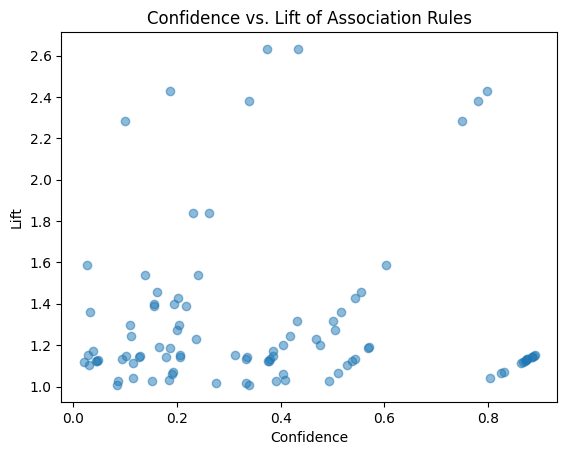

In [9]:
import matplotlib.pyplot as plt

plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs. Lift of Association Rules')
plt.show()